In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

Feature scores in descending order:
asymmetry_1 (1.51)
asymmetry_2 (1.45)
color_asymmetry_1 (0.73)
border_irregularity (0.29)
color_asymmetry_2 (0.08)
texture_contrast (0.04)
texture_dissemilarity (0.02)


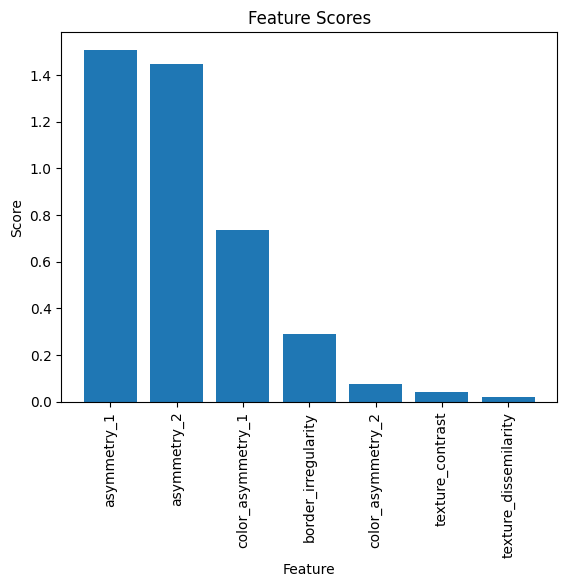

In [10]:
# Load the data into a pandas DataFrame
data = pd.read_csv('feature_output_normalized.csv')

# Replace 'MEL' with 1 and any other value with 0 in the 'diagnostic' column
data['diagnostic'] = data['diagnostic'].apply(lambda x: 1 if x == 'MEL' else 0)

# Extract the output variable
y = data['diagnostic'].values

# Extract the features excluding first column ('img_id'), second column ('diagnostic'), and third column ('patient_id')
X = data.iloc[:, 3:].values

# Use SelectKBest to calculate feature scores
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the feature scores
scores = selector.scores_

# Print the feature scores in descending order
print('Feature scores in descending order:')
sorted_indices = np.argsort(-scores)
sorted_scores = scores[sorted_indices]
sorted_features = data.columns[sorted_indices + 3]  # offset adjusted for 'img_id', 'diagnostic', and 'patient_id'
for i, feature in enumerate(sorted_features):
    print(f'{feature} ({sorted_scores[i]:.2f})')

# Plot the histogram
plt.bar(sorted_features, sorted_scores)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.show()